In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
hipp_train = pd.read_csv('/mnt/c/Users/João/Documents/DAA/Projeto/train_radiomics_hipocamp.csv',na_filter=False)

In [3]:
hipp_test = pd.read_csv('/mnt/c/Users/João/Documents/DAA/Projeto/test_radiomics_hipocamp.csv',na_filter=False)

In [4]:
hipp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2181 entries, ID to Transition
dtypes: float64(2014), int64(147), object(20)
memory usage: 5.1+ MB


In [6]:
hipp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2180 entries, ID to Age
dtypes: float64(2011), int64(150), object(19)
memory usage: 1.7+ MB


In [5]:
hipp_train.shape

(305, 2181)

In [7]:
hipp_test.shape

(100, 2180)

In [8]:
hipp_train.describe()

,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,lbp-3D-k_glszm_ZoneEntropy,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age
count,305.0,305.000000,305.0,305.000000,305.000000,305.0,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,3.0,5.810469,0.0,173.504918,6714.790164,2.0,0.411819,0.096916,10.137707,104.883349,...,2.681657,0.010477,266015.006289,362.064990,0.002024,0.155767,0.012415,0.002091,0.567213,75.171148
std,0.0,0.613858,0.0,24.108871,1066.815670,0.0,0.028993,0.009739,0.911329,6.180335,...,0.259507,0.002009,59267.210682,102.133366,0.000531,0.024285,0.003814,0.000552,0.496276,6.675866
min,3.0,4.321602,0.0,128.000000,3609.000000,2.0,0.330890,0.075142,8.420713,90.675836,...,1.984788,0.005818,138177.996378,130.618182,0.001137,0.071124,0.002565,0.001168,0.000000,55.300000
25%,3.0,5.317298,0.0,157.000000,5941.000000,2.0,0.392944,0.089977,9.525253,100.501871,...,2.507947,0.009060,225781.559367,285.617369,0.001632,0.140791,0.009751,0.001688,0.000000,71.300000
50%,3.0,5.811449,0.0,172.000000,6723.000000,2.0,0.412479,0.096609,10.106838,104.370667,...,2.688709,0.010580,259226.493061,353.841144,0.001934,0.156580,0.012297,0.001995,1.000000,75.000000
75%,3.0,6.237751,0.0,190.000000,7396.000000,2.0,0.431621,0.102240,10.635093,108.677326,...,2.844025,0.011706,298836.166667,431.288497,0.002305,0.173700,0.015166,0.002373,1.000000,79.900000
max,3.0,7.583210,0.0,255.000000,9453.000000,2.0,0.491496,0.144082,14.370911,126.209296,...,3.494062,0.017015,465865.829238,670.406531,0.004325,0.223273,0.024548,0.004417,1.000000,91.000000


In [10]:
hipp_train.head()

,ID,Image,Mask,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


In [11]:
fig = plt.figure(figsize = (5,5))
hipp_corr = hipp_train.corr( method = 'pearson' )
sns.heatmap(hipp_corr, linecolor='black', linewidths=0.5)

ValueError: could not convert string to float: '006_S_0681'

<Figure size 500x500 with 0 Axes>

In [102]:
hipp_train.nunique()

ID                                  305
Image                               305
Mask                                305
diagnostics_Versions_PyRadiomics      1
diagnostics_Versions_Numpy            1
                                   ... 
lbp-3D-k_ngtdm_Contrast             305
lbp-3D-k_ngtdm_Strength             305
Sex                                   2
Age                                 184
Transition                            5
Length: 2181, dtype: int64

In [103]:
hipp_test.nunique()

ID                                  100
Image                               100
Mask                                100
diagnostics_Versions_PyRadiomics      1
diagnostics_Versions_Numpy            1
                                   ... 
lbp-3D-k_ngtdm_Complexity           100
lbp-3D-k_ngtdm_Contrast             100
lbp-3D-k_ngtdm_Strength             100
Sex                                   2
Age                                  78
Length: 2180, dtype: int64

In [104]:
contador = 0 
for column in hipp_test.columns:
    if hipp_test[column].nunique() == 1: 
        print(f"A coluna: '{column}' tem apenas um valor único.")
        contador +=1
print(f"Colunas com valor 1:{contador}")

A coluna: 'diagnostics_Versions_PyRadiomics' tem apenas um valor único.
A coluna: 'diagnostics_Versions_Numpy' tem apenas um valor único.
A coluna: 'diagnostics_Versions_SimpleITK' tem apenas um valor único.
A coluna: 'diagnostics_Versions_PyWavelet' tem apenas um valor único.
A coluna: 'diagnostics_Versions_Python' tem apenas um valor único.
A coluna: 'diagnostics_Configuration_Settings' tem apenas um valor único.
A coluna: 'diagnostics_Configuration_EnabledImageTypes' tem apenas um valor único.
A coluna: 'diagnostics_Image-original_Dimensionality' tem apenas um valor único.
A coluna: 'diagnostics_Image-original_Spacing' tem apenas um valor único.
A coluna: 'diagnostics_Image-original_Size' tem apenas um valor único.
A coluna: 'diagnostics_Image-original_Minimum' tem apenas um valor único.
A coluna: 'diagnostics_Mask-original_Spacing' tem apenas um valor único.
A coluna: 'diagnostics_Mask-original_Size' tem apenas um valor único.
A coluna: 'diagnostics_Mask-original_VolumeNum' tem ape

In [ ]:
#Verificar as colunas que tem apenas 1 valor 
contador = 0
for column in hipp_train.columns:
    if hipp_train[column].nunique() == 1: 
        print(f"A coluna: '{column}' tem apenas 1 valor único.")
        contador +=1 
print(f"Numero total de colunas de um valor: '{contador}'")

In [106]:
#Remover as colunas que tem apenas 1 valor 
hipp_train_c = hipp_train.loc[:, hipp_train.nunique() > 1]
colunas_removidas = hipp_train.columns[hipp_train.nunique() == 1]
print(f"Colunas removidas: {colunas_removidas}")

Colunas removidas: Index(['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
       'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
       'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
       ...
       'lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis',
       'lbp-3D-m2_glszm_LowGrayLevelZoneEmphasis',
       'lbp-3D-m2_glszm_SizeZoneNonUniformity',
       'lbp-3D-m2_glszm_SizeZoneNonUniformityNormalized',
       'lbp-3D-m2_glszm_ZoneEntropy', 'lbp-3D-m2_ngtdm_Busyness',
       'lbp-3D-m2_ngtdm_Coarseness', 'lbp-3D-m2_ngtdm_Complexity',
       'lbp-3D-m2_ngtdm_Contrast', 'lbp-3D-m2_ngtdm_Strength'],
      dtype='object', length=159)


In [107]:
#Remover os valores nunique de treino
hipp_test_c = hipp_test.loc[:, hipp_test.nunique() > 1]
colunas_removidas = hipp_test.columns[hipp_test.nunique() == 1]
print(f"As colunas que foram removidas '{colunas_removidas}'")

As colunas que foram removidas 'Index(['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
       'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
       'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
       ...
       'lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis',
       'lbp-3D-m2_glszm_LowGrayLevelZoneEmphasis',
       'lbp-3D-m2_glszm_SizeZoneNonUniformity',
       'lbp-3D-m2_glszm_SizeZoneNonUniformityNormalized',
       'lbp-3D-m2_glszm_ZoneEntropy', 'lbp-3D-m2_ngtdm_Busyness',
       'lbp-3D-m2_ngtdm_Coarseness', 'lbp-3D-m2_ngtdm_Complexity',
       'lbp-3D-m2_ngtdm_Contrast', 'lbp-3D-m2_ngtdm_Strength'],
      dtype='object', length=159)'


In [108]:
#Verificar as colunas que tem apenas 1 valor 
contador = 0
for column in hipp_train_c.columns:
    if hipp_train_c[column].nunique() == 1: 
        print(f"A coluna: '{column}' tem apenas 1 valor único.")
        contador +=1 
print(f"Numero total de colunas de um valor: '{contador}'")

Numero total de colunas de um valor: '0'


In [109]:
hipp_train_c.shape

(305, 2022)

In [110]:
hipp_train_c.isnull().sum()

ID                                 0
Image                              0
Mask                               0
diagnostics_Image-original_Hash    0
diagnostics_Image-original_Mean    0
                                  ..
lbp-3D-k_ngtdm_Contrast            0
lbp-3D-k_ngtdm_Strength            0
Sex                                0
Age                                0
Transition                         0
Length: 2022, dtype: int64

In [111]:
#Verificar se existem valores nulos 
total_null = 0
for column in hipp_train_c.columns:
    total_null+= hipp_train_c[column].isnull().sum()

print(f"Valores nulos:'{total_null}'")

Valores nulos:'0'


In [112]:
for column in hipp_train_c.columns:
    print(f"A coluna '{column}' tem o tipo de dados: {hipp_train_c[column].dtype}")

A coluna 'ID' tem o tipo de dados: object
A coluna 'Image' tem o tipo de dados: object
A coluna 'Mask' tem o tipo de dados: object
A coluna 'diagnostics_Image-original_Hash' tem o tipo de dados: object
A coluna 'diagnostics_Image-original_Mean' tem o tipo de dados: float64
A coluna 'diagnostics_Image-original_Maximum' tem o tipo de dados: int64
A coluna 'diagnostics_Mask-original_Hash' tem o tipo de dados: object
A coluna 'diagnostics_Mask-original_BoundingBox' tem o tipo de dados: object
A coluna 'diagnostics_Mask-original_VoxelNum' tem o tipo de dados: int64
A coluna 'diagnostics_Mask-original_CenterOfMassIndex' tem o tipo de dados: object
A coluna 'diagnostics_Mask-original_CenterOfMass' tem o tipo de dados: object
A coluna 'original_shape_Elongation' tem o tipo de dados: float64
A coluna 'original_shape_Flatness' tem o tipo de dados: float64
A coluna 'original_shape_LeastAxisLength' tem o tipo de dados: float64
A coluna 'original_shape_MajorAxisLength' tem o tipo de dados: float64


In [113]:
# Contar e listar cada tipo de dado e o número de colunas
dtype_counts = hipp_train_c.dtypes.value_counts()

print("Contagem de tipos de dados:")
print(dtype_counts)

Contagem de tipos de dados:
float64    1994
int64        19
object        9
Name: count, dtype: int64


In [114]:
#Saber quais são as colunas do tipo objeto. 
object_columns = hipp_train_c.select_dtypes(include='object').columns
print(object_columns)

Index(['ID', 'Image', 'Mask', 'diagnostics_Image-original_Hash',
       'diagnostics_Mask-original_Hash',
       'diagnostics_Mask-original_BoundingBox',
       'diagnostics_Mask-original_CenterOfMassIndex',
       'diagnostics_Mask-original_CenterOfMass', 'Transition'],
      dtype='object')


In [115]:
mapping = {
    'CN-CN': 1,  # Estado Normal
    'CN-MCI': 2,  # Estado Intermediário
    'MCI-MCI': 2,  # Estado Intermediário
    'MCI-AD': 3,  # Demência
    'AD-AD': 3   # Demência
}

# Aplicar o mapeamento à coluna 'Transition'
hipp_train_c['Transition_Numeric'] = hipp_train_c['Transition'].map(mapping)

# Verificar o resultado
print(hipp_train_c[['Transition', 'Transition_Numeric']].head())


  Transition  Transition_Numeric
0      CN-CN                   1
1      CN-CN                   1
2      AD-AD                   3
3     CN-MCI                   2
4      CN-CN                   1


/tmp/ipykernel_2602/1283223948.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hipp_train_c['Transition_Numeric'] = hipp_train_c['Transition'].map(mapping)


A coluna 'Transition' não está presente no dataset de teste.


In [32]:
hipp_train_c['Transition'] = hipp_train_c['Transition'].map(mapping)

In [33]:
# Remove as colunas específicas, mantendo as outras, incluindo 'ID' e 'Mask'
hipp_train_c = hipp_train_c.drop(['Image', 'diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash',
              'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex',
              'diagnostics_Mask-original_CenterOfMass'], axis=1)


KeyError: "['Image', 'diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass'] not found in axis"

In [122]:
# Remove as colunas específicas, mantendo as outras, incluindo 'ID' e 'Mask'
hipp_test_c = hipp_test_c.drop(['Image', 'diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash',
              'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex',
              'diagnostics_Mask-original_CenterOfMass'], axis=1)

In [123]:
#Saber quais são as colunas do tipo objeto. 
object_columns = hipp_train_c.select_dtypes(include='object').columns
print(object_columns)

Index(['ID', 'Mask'], dtype='object')


In [37]:
#Transformar o ID para o normal 
hipp_train_c['ID'] = range(1, len(hipp_train_c) + 1)

# Opcional: redefinir o índice para iniciar em 1 também
hipp_train_c = hipp_train_c.reset_index(drop=True)
hipp_train_c.index += 1


In [125]:
#Transformar o ID para o normal 
hipp_test_c['ID'] = range(1, len(hipp_test_c) + 1)

# Opcional: redefinir o índice para iniciar em 1 também
hipp_test_c = hipp_test_c.reset_index(drop=True)
hipp_test_c.index += 1


In [41]:
hipp_train_c = hipp_train_c.drop(['Mask'], axis=1)

In [126]:
hipp_test_c = hipp_test_c.drop(['Mask'], axis=1)

In [127]:
# Exemplo: selecionar as primeiras 50 colunas
subset_corr = hipp_train_c.iloc[:, :50].corr(method='pearson')
sns.heatmap(subset_corr, linewidths=0.5, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: '006_S_0681'

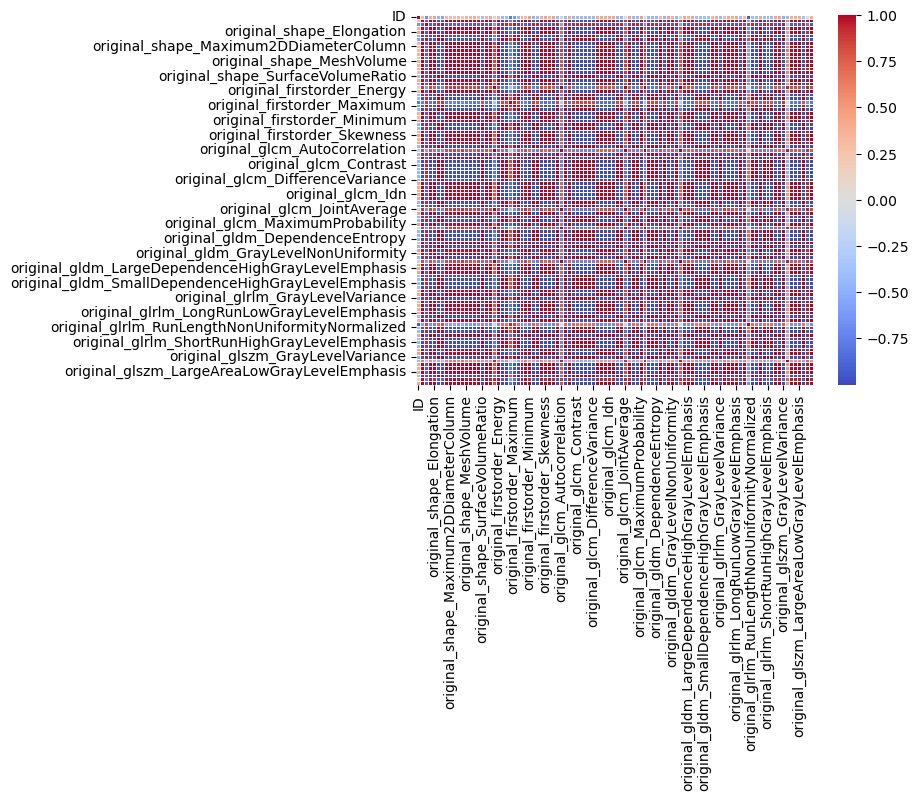

In [48]:
subset_corr = hipp_train_c.iloc[:50, :100].corr(method='pearson')
sns.heatmap(subset_corr, linewidths=0.5, cmap='coolwarm')
plt.show()

In [128]:
from sklearn.model_selection import train_test_split 
X = hipp_train_c.drop(['Transition'], axis= 1)
y = hipp_train_c['Transition']

In [129]:
X.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition_Numeric
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,5.810469,173.504918,6714.790164,0.411819,0.096916,10.137707,104.883349,74.609887,74.637410,43.088716,...,0.010477,266015.006289,362.064990,0.002024,0.155767,0.012415,0.002091,0.567213,75.171148,2.104918
std,0.613858,24.108871,1066.815670,0.028993,0.009739,0.911329,6.180335,4.077476,4.046765,2.447864,...,0.002009,59267.210682,102.133366,0.000531,0.024285,0.003814,0.000552,0.496276,6.675866,0.851938
min,4.321602,128.000000,3609.000000,0.330890,0.075142,8.420713,90.675836,64.327288,65.069194,36.674242,...,0.005818,138177.996378,130.618182,0.001137,0.071124,0.002565,0.001168,0.000000,55.300000,1.000000
25%,5.317298,157.000000,5941.000000,0.392944,0.089977,9.525253,100.501871,71.568149,71.568149,41.436699,...,0.009060,225781.559367,285.617369,0.001632,0.140791,0.009751,0.001688,0.000000,71.300000,1.000000
50%,5.811449,172.000000,6723.000000,0.412479,0.096609,10.106838,104.370667,74.545288,75.006666,43.081318,...,0.010580,259226.493061,353.841144,0.001934,0.156580,0.012297,0.001995,1.000000,75.000000,2.000000
75%,6.237751,190.000000,7396.000000,0.431621,0.102240,10.635093,108.677326,77.317527,77.233412,44.721360,...,0.011706,298836.166667,431.288497,0.002305,0.173700,0.015166,0.002373,1.000000,79.900000,3.000000
max,7.583210,255.000000,9453.000000,0.491496,0.144082,14.370911,126.209296,89.140339,89.022469,48.662100,...,0.017015,465865.829238,670.406531,0.004325,0.223273,0.024548,0.004417,1.000000,91.000000,3.000000


In [56]:
from sklearn.model_selection import RandomizedSearchCV

randomized_grid_dt = RandomizedSearchCV(estimator_dt, param_grid_dt, n_iter=10, cv=3, scoring='accuracy', refit=True, verbose=2, random_state=2022)
randomized_grid_dt.fit(X, y)

NameError: name 'estimator_dt' is not defined

In [ ]:
# Importar bibliotecas necessárias
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Gerar um dataset de exemplo (substitua esta parte pelo seu dataset)
X, y = make_classification(n_samples=300, n_features=2015, n_informative=50, n_redundant=50, random_state=2022)

# Definir o estimador
estimator_dt = DecisionTreeClassifier(random_state=2022)

# Definir o espaço de hiperparâmetros ampliado
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],  # Critérios válidos para a árvore de decisão
    'classifier__max_depth': [None, 1, 3, 5, 7, 10, 15, 20],  # Profundidades de árvore
    'classifier__min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'classifier__min_samples_leaf': [1, 2, 5],     # Número mínimo de amostras em um nó folha
}

# Criar o pipeline para seleção de características e classificação
select_k = SelectKBest(f_classif, k=100)  # Selecionar as 100 melhores características
pipeline_dt = Pipeline([
    ('feature_selection', select_k),
    ('classifier', estimator_dt)
])

# Criar o RandomizedSearchCV
randomized_grid_dt = RandomizedSearchCV(
    pipeline_dt, 
    param_distributions=param_grid_dt, 
    n_iter=50,              # Aumentar o número de combinações a serem testadas
    cv=5,                   # Aumentar o número de folds para validação cruzada
    scoring='accuracy',     # Métrica a ser otimizada
    refit=True,             # Reajustar o modelo no melhor conjunto de hiperparâmetros
    verbose=2,              # Nível de verbosidade
    random_state=2022       # Semente para reprodutibilidade
)

# Ajustar o modelo
randomized_grid_dt.fit(X, y)

# Resultados
print("Melhores Hiperparâmetros Encontrados:")
print(randomized_grid_dt.best_params_)

print("Melhor Acurácia:")
print(randomized_grid_dt.best_score_)